In [1]:
DATA_DIR = "/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_clones = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0/clones/all/mapping.tsv.gz", sep="\t")
df_clones

,#CELL,CLUSTER,CLONE
0,A-AAACCTGAGATCTGCT,401,Clone401
1,A-AAACCTGGTACCGCTG,2535,Clone2535
2,A-AAACCTGGTGCTGTAT,2535,Clone2535
3,A-AAACCTGTCCGCGGAT,2668,NaN
4,A-AAACGGGCATGTATGC,2535,Clone2535
...,...,...,...
10197,E-TTTGTCAAGTAGATGT,973,Clone973
10198,E-TTTGTCACAATTCACG,1321,NaN
10199,E-TTTGTCATCGAAATCC,2535,Clone2535
10200,E-TTTGTCATCGAACAAA,953,Clone953


In [4]:
counts = df_clones["CLUSTER"].value_counts()
counts_gt_t = counts[counts > 5]
print(counts_gt_t)

CLUSTER
2535    4239
401     1823
973     1686
953      141
484      129
1101     107
1107      88
948       72
2539      46
889       39
1613       9
1813       7
Name: count, dtype: int64


In [5]:
df_calls_part1 = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0/calls/all/calls.part1.tsv.gz", sep="\t")
df_calls_part2 = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0/calls/all/calls.part2.tsv.gz", sep="\t", 
                             names=df_calls_part1.columns.to_list())
df_calls = pd.concat([df_calls_part1, df_calls_part2])
df_calls

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2


In [7]:
df_calls["TOTAL_CN"] = (
    df_calls["CN_STATE"].str.split("|", expand=True).astype(int).sum(axis=1)
)
df_calls

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,TOTAL_CN
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,3
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,2
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,2
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,5
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,4
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,3
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,2
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,4


In [8]:
df_calls["POSITION"] = df_calls["#CHR"] + ":" + df_calls["START"].astype(str) + ":" + df_calls["END"].astype(str)
df_calls

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,TOTAL_CN,POSITION
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,3,chr1:0:5000000
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,2,chr1:0:5000000
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,2,chr1:0:5000000
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,5,chr1:0:5000000
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,2,chr1:0:5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,4,chr22:50000000:50818468
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,3,chr22:50000000:50818468
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,2,chr22:50000000:50818468
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,4,chr22:50000000:50818468


In [9]:
df_cn = df_calls.pivot(
    index="CELL", columns="POSITION", values="TOTAL_CN")
df_cn = df_cn.clip(upper=10)
df_cn

POSITION,chr10:0:5000000,chr10:100000000:105000000,chr10:10000000:15000000,chr10:105000000:110000000,chr10:110000000:115000000,chr10:115000000:120000000,chr10:120000000:125000000,chr10:125000000:130000000,chr10:130000000:133797422,chr10:15000000:20000000,...,chr9:45000000:50000000,chr9:5000000:10000000,chr9:60000000:65000000,chr9:65000000:70000000,chr9:70000000:75000000,chr9:75000000:80000000,chr9:80000000:85000000,chr9:85000000:90000000,chr9:90000000:95000000,chr9:95000000:100000000
CELL,,,,,,,,,,,,,,,,,,,,,
A-AAACCTGAGATCTGCT,3,2,3,2,2,2,3,4,4,3,...,3,4,4,4,4,4,4,4,4,4
A-AAACCTGGTACCGCTG,2,2,2,2,2,2,2,2,2,2,...,5,2,2,2,2,2,2,2,2,2
A-AAACCTGGTGCTGTAT,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
A-AAACCTGTCCGCGGAT,3,3,3,0,3,3,4,2,2,3,...,2,4,3,4,4,4,4,4,4,4
A-AAACGGGCATGTATGC,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E-TTTGTCAAGTAGATGT,4,2,4,2,2,2,3,4,4,4,...,2,4,4,4,4,4,4,4,4,4
E-TTTGTCACAATTCACG,4,2,4,2,2,2,3,3,3,4,...,3,4,4,4,4,4,4,4,4,4
E-TTTGTCATCGAAATCC,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralBiclustering
import numpy as np
import seaborn as sns
import pandas as pd
import string

In [35]:
def plot_spectral_clustering(F, n_clusters=7):
    model = SpectralBiclustering(n_clusters=n_clusters, method='log', random_state=0)
    model.fit(F.values)

    frac_biclust = F.iloc[np.argsort(model.row_labels_)]
    frac_biclust = frac_biclust.iloc[:, np.argsort(model.column_labels_)]

    sns.heatmap(frac_biclust, cmap='coolwarm')

    # Get where the cluster boundaries are
    row_order = np.argsort(model.row_labels_)
    col_order = np.argsort(model.column_labels_)

    row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
    col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

    row_lines = np.cumsum(row_counts)[:-1]
    col_lines = np.cumsum(col_counts)[:-1]

    # Plot with boundaries
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)

    # Draw horizontal lines
    for r in row_lines:
        ax.axhline(r, color='white', lw=2)

    # Draw vertical lines
    for c in col_lines:
        ax.axvline(c, color='white', lw=2)

    plt.show()

    cluster_map = dict(enumerate(string.ascii_uppercase))

    cell_to_cluster = pd.DataFrame({
        "CELL": F.index,
        "CN_CLUSTER":  [cluster_map[i] for i in model.row_labels_]
    })
    mutation_to_cluster = pd.DataFrame({
        "MUTATION": F.columns,
        "MUTATION_CLUSTER": model.column_labels_
    })

    return cell_to_cluster, mutation_to_cluster


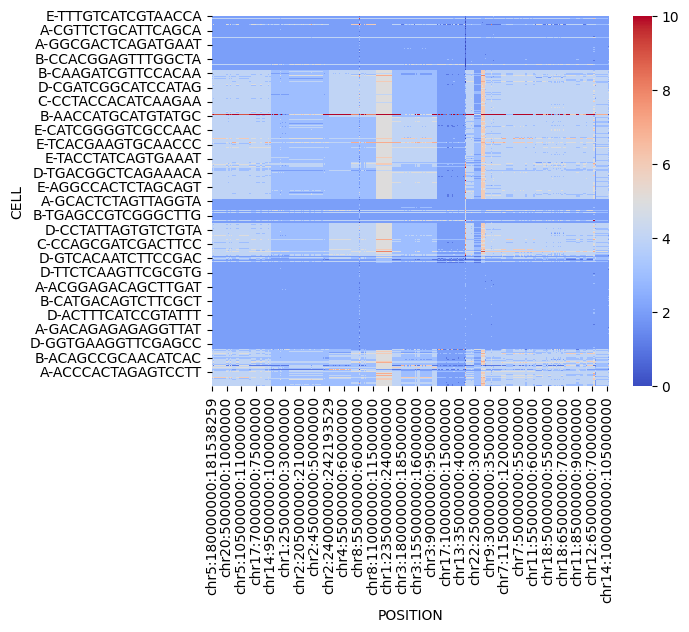

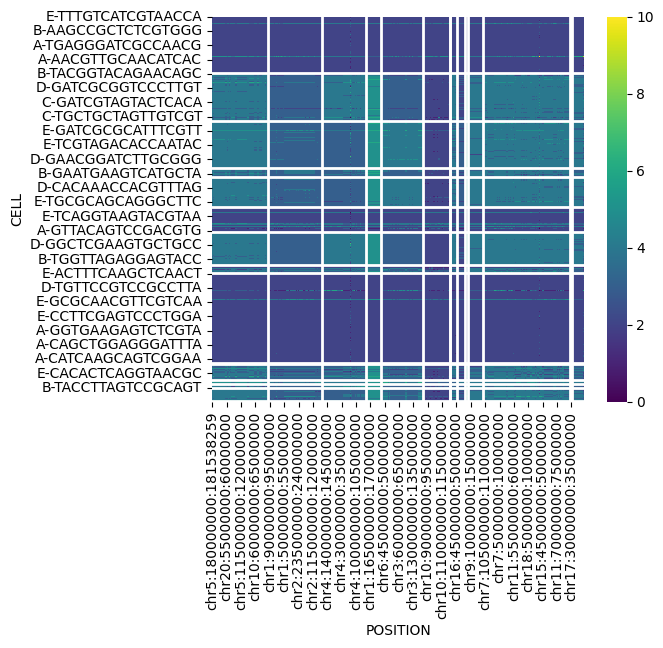

In [36]:
cell_to_cluster, _ = plot_spectral_clustering(df_cn, n_clusters=15)

In [38]:
cell_to_cluster

,CELL,CN_CLUSTER
0,A-AAACCTGAGATCTGCT,B
1,A-AAACCTGGTACCGCTG,F
2,A-AAACCTGGTGCTGTAT,A
3,A-AAACCTGTCCGCGGAT,A
4,A-AAACGGGCATGTATGC,A
...,...,...
10197,E-TTTGTCAAGTAGATGT,C
10198,E-TTTGTCACAATTCACG,C
10199,E-TTTGTCATCGAAATCC,I
10200,E-TTTGTCATCGAACAAA,C


In [39]:
cell_to_cluster["CN_CLUSTER"].value_counts()

CN_CLUSTER
I    2373
A    1494
B    1276
C    1246
G     875
E     782
F     655
K     410
N     362
D     240
H     229
L     120
M      95
J      34
O      11
Name: count, dtype: int64

In [14]:
(df_calls["END"] - df_calls["START"]).value_counts()

5000000    5590696
3275309      10202
1709983      10202
4444167      10202
3617616      10202
373285       10202
3257441      10202
338345       10202
1991189      10202
2043718      10202
4364328      10202
86622        10202
3956422      10202
3797422      10202
3394717      10202
138636       10202
4345973      10202
805979       10202
1538259      10202
214555       10202
3295559      10202
2193529      10202
818468       10202
Name: count, dtype: int64

In [15]:
df_calls["#CHR"].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22'],
      dtype=object)

In [23]:
df_cell_mutations = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0/snvs/cellmutations.tsv.gz", sep="\t")
df_cell_mutations

,#CHR,START,END,REF,ALT,HARBORING_CELLS
0,chr1,10071,10071,C,G,"A-AACGTTGCAGGTCAAG,A-GACGGCTGTGGCAAAC,A-GCTGCT..."
1,chr1,10185,10185,C,T,"B-TGACTAGGTAACGTGG,C-GCCTCTATCGTGAGGA,E-CTGCCT..."
2,chr1,10219,10219,C,A,"A-AAAGATGTCTCATCTA,A-ACATACGAGAGTAATC,A-CTACGT..."
3,chr1,10347,10347,A,C,"B-ATCGAGTGTTCGATTG,C-AGTAGTCCATGCAGTT,D-TTTGCG..."
4,chr1,109116,109116,G,T,"C-AACTCAGCAGGGAAGG,C-TACTTACCAACGCGCT,E-AACTCA..."
...,...,...,...,...,...,...
49295,chr22,50594999,50594999,G,A,"B-GGGCACTGTAACAATG,E-CTCTGGTGTCTCGAGC,E-GCATGA..."
49296,chr22,50643967,50643967,G,C,"C-TCGGGACGTAGCGTCC,E-GATCGCGAGTCTAGCT,E-TACCTA..."
49297,chr22,50656001,50656001,G,T,"E-TAGCCGGTCAATAGGA,E-TGAGCCGGTTCAGTGT"
49298,chr22,50700755,50700755,T,G,"A-ACATCAGAGACAAGCC,D-ACATGGTAGTCTAGCT,D-ATCACG..."


In [24]:
df = df_cell_mutations
df["HARBORING_CELLS"] = df["HARBORING_CELLS"].str.split(",")
df_normalized = df.explode("HARBORING_CELLS").reset_index(drop=True)
df_normalized["HARBORING_CELLS"] = df_normalized["HARBORING_CELLS"].str.strip()
df_cell_mutations_normalized = df_normalized
df_cell_mutations_normalized

,#CHR,START,END,REF,ALT,HARBORING_CELLS
0,chr1,10071,10071,C,G,A-AACGTTGCAGGTCAAG
1,chr1,10071,10071,C,G,A-GACGGCTGTGGCAAAC
2,chr1,10071,10071,C,G,A-GCTGCTTGTTACGCGC
3,chr1,10071,10071,C,G,B-TTGTAGGGTCAGAAGC
4,chr1,10071,10071,C,G,C-GCATGTACATTATCGG
...,...,...,...,...,...,...
535762,chr22,50807980,50807980,G,T,E-AACTTTCGTCGGATGA
535763,chr22,50807980,50807980,G,T,E-ACGGGTCTCGATCCGG
535764,chr22,50807980,50807980,G,T,E-AGTGAGGTCGACCATA
535765,chr22,50807980,50807980,G,T,E-CTCAGAATCTGGGATT


In [25]:
df = df_cell_mutations_normalized
df["MUTATION"] = df["#CHR"] + ":" + df["START"].astype(str) + ":" + df["REF"] + ":" + df["ALT"]
df_cell_mutations_normalized

,#CHR,START,END,REF,ALT,HARBORING_CELLS,MUTATION
0,chr1,10071,10071,C,G,A-AACGTTGCAGGTCAAG,chr1:10071:C:G
1,chr1,10071,10071,C,G,A-GACGGCTGTGGCAAAC,chr1:10071:C:G
2,chr1,10071,10071,C,G,A-GCTGCTTGTTACGCGC,chr1:10071:C:G
3,chr1,10071,10071,C,G,B-TTGTAGGGTCAGAAGC,chr1:10071:C:G
4,chr1,10071,10071,C,G,C-GCATGTACATTATCGG,chr1:10071:C:G
...,...,...,...,...,...,...,...
535762,chr22,50807980,50807980,G,T,E-AACTTTCGTCGGATGA,chr22:50807980:G:T
535763,chr22,50807980,50807980,G,T,E-ACGGGTCTCGATCCGG,chr22:50807980:G:T
535764,chr22,50807980,50807980,G,T,E-AGTGAGGTCGACCATA,chr22:50807980:G:T
535765,chr22,50807980,50807980,G,T,E-CTCAGAATCTGGGATT,chr22:50807980:G:T


In [40]:
df_cell_mutations_normalized = pd.merge(
    df_cell_mutations_normalized,
    cell_to_cluster,
    left_on="HARBORING_CELLS",
    right_on="CELL",
    how="left",
)
df_cell_mutations_normalized

,#CHR,START,END,REF,ALT,HARBORING_CELLS,MUTATION,CELL,CN_CLUSTER
0,chr1,10071,10071,C,G,A-AACGTTGCAGGTCAAG,chr1:10071:C:G,A-AACGTTGCAGGTCAAG,A
1,chr1,10071,10071,C,G,A-GACGGCTGTGGCAAAC,chr1:10071:C:G,A-GACGGCTGTGGCAAAC,A
2,chr1,10071,10071,C,G,A-GCTGCTTGTTACGCGC,chr1:10071:C:G,A-GCTGCTTGTTACGCGC,A
3,chr1,10071,10071,C,G,B-TTGTAGGGTCAGAAGC,chr1:10071:C:G,B-TTGTAGGGTCAGAAGC,B
4,chr1,10071,10071,C,G,C-GCATGTACATTATCGG,chr1:10071:C:G,C-GCATGTACATTATCGG,I
...,...,...,...,...,...,...,...,...,...
535762,chr22,50807980,50807980,G,T,E-AACTTTCGTCGGATGA,chr22:50807980:G:T,E-AACTTTCGTCGGATGA,E
535763,chr22,50807980,50807980,G,T,E-ACGGGTCTCGATCCGG,chr22:50807980:G:T,E-ACGGGTCTCGATCCGG,C
535764,chr22,50807980,50807980,G,T,E-AGTGAGGTCGACCATA,chr22:50807980:G:T,E-AGTGAGGTCGACCATA,A
535765,chr22,50807980,50807980,G,T,E-CTCAGAATCTGGGATT,chr22:50807980:G:T,E-CTCAGAATCTGGGATT,G


In [54]:
mutation_counts = df_cell_mutations_normalized["MUTATION"].value_counts()
top_mutations = mutation_counts[mutation_counts >= 50].index.to_list()

In [55]:
df_mutated_cells = (
    df_cell_mutations_normalized[df_cell_mutations_normalized["MUTATION"].isin(top_mutations)].pivot_table(
        index="CN_CLUSTER",
        columns="MUTATION",
        values="CELL",
        aggfunc="count",
        fill_value=0
    )
)
df_mutated_cells

MUTATION,chr10:124592075:T:C,chr10:128464565:A:C,chr10:128464595:T:G,chr10:129331391:C:A,chr10:132154858:G:A,chr10:133011269:C:A,chr10:133687764:C:G,chr10:133687857:T:C,chr10:133687901:C:T,chr10:133687905:T:C,...,chr9:70038250:A:C,chr9:70038251:T:A,chr9:70038345:A:T,chr9:70038406:T:C,chr9:70038422:G:T,chr9:71706963:G:A,chr9:71706993:T:C,chr9:89371940:T:G,chr9:89371961:T:G,chr9:90782913:C:T
CN_CLUSTER,,,,,,,,,,,,,,,,,,,,,
A,0,9,12,0,14,8,7,7,8,7,...,8,11,13,14,16,10,7,14,5,0
B,13,12,12,19,19,11,17,11,14,10,...,19,16,14,22,15,25,31,12,5,20
C,21,19,13,18,10,4,12,15,22,20,...,24,18,13,10,11,11,10,15,6,22
D,1,0,0,0,0,0,0,0,1,1,...,0,2,0,0,0,0,0,0,0,0
E,8,9,10,12,6,8,11,2,3,5,...,13,12,20,8,15,9,7,15,5,15
F,0,5,7,0,4,2,6,1,5,4,...,9,4,4,6,4,2,1,6,4,0
G,9,10,11,11,6,6,11,4,15,5,...,22,14,12,9,13,19,13,5,6,10
H,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
I,0,25,18,0,20,14,19,9,11,14,...,42,18,20,16,28,15,8,30,19,0


In [53]:
df_cell_mutations["HARBORING_CELLS"].str.split(",").str.len()

0        11
1         3
2        22
3         4
4         5
         ..
49295     3
49296     3
49297     2
49298     8
49299    28
Name: HARBORING_CELLS, Length: 49300, dtype: int64

In [47]:
df_vaf_analysis = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/chisel/patientS0/snvs/vafanalysis.tsv.gz", sep="\t")
df_vaf_analysis

,#CHR,POS,TOT,VAR,VAF,TUMOR_VAF,CLASS,LEFT_VAF,RIGHT_VAF
0,chr1,10071,1274,11,0.008634,0.008902,tumor+diploid,0.006689,0.010667
1,chr1,10185,505,3,0.005941,0.003610,tumor+diploid,0.008850,0.000000
2,chr1,10219,396,22,0.055556,0.059574,tumor+diploid,0.046729,0.070312
3,chr1,10347,324,4,0.012346,0.011628,tumor+diploid,0.000000,0.022472
4,chr1,109116,476,5,0.010504,0.014493,tumor+diploid,0.007407,0.021277
...,...,...,...,...,...,...,...,...,...
49295,chr22,50594999,208,3,0.014423,0.023810,conflict,0.033333,0.015152
49296,chr22,50643967,343,3,0.008746,0.014286,clonal,0.011364,0.016393
49297,chr22,50656001,209,2,0.009569,0.008333,tumor+diploid,0.000000,0.016949
49298,chr22,50700755,261,8,0.030651,0.036585,tumor+diploid,0.025316,0.047059


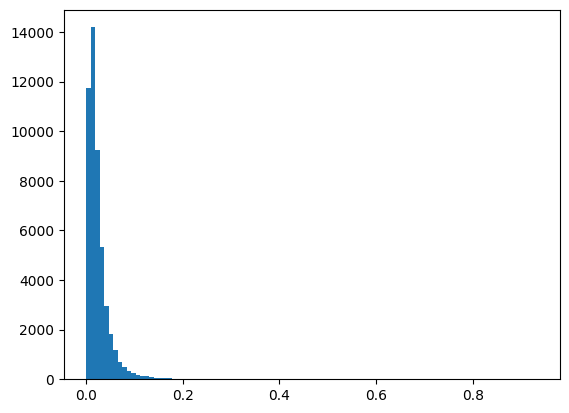

In [49]:
plt.hist(df_vaf_analysis["TUMOR_VAF"], bins=100)
plt.show()